## With the data wrangling completed, it's time to see what story the data tells.

In [1]:
#Import modules and data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date, timedelta
from datetime import datetime
from tqdm import tqdm
import matplotlib.dates as mdates
from pandas.tseries.offsets import *

df = pd.read_csv (r"...\Demand Forecasting Data Wrangling.csv", index_col=0, low_memory=False, skipinitialspace=True)

df.reset_index(inplace=True, drop=True)

print(df.head())
print(df.info())


   Company Company Name   Item                     Description  Qty STOCK_UOM  \
0      100          WSS  82834  SET BLOOD 23GA12IN PSHBTN W LL  600      EA     
1      100          WSS  82834  SET BLOOD 23GA12IN PSHBTN W LL  400      EA     
2      100          WSS  82834  SET BLOOD 23GA12IN PSHBTN W LL  600      EA     
3      100          WSS  82834  SET BLOOD 23GA12IN PSHBTN W LL  900      EA     
4      100          WSS  82834  SET BLOOD 23GA12IN PSHBTN W LL  400      EA     

  Trans_UOM  UNIT_COST  Ext Amount  TRANS_DATE  ... ALT_UOM_CONV_05  \
0      BX         1.25       750.0  2019-07-08  ...               0   
1      BX         1.25       500.0  2019-07-09  ...               0   
2      BX         1.25       750.0  2019-07-10  ...               0   
3      BX         1.25      1125.0  2019-08-26  ...               0   
4      BX         1.25       500.0  2019-08-22  ...               0   

  ALT_UOM_CONV_06  BUY_FL_01 BUY_FL_02  BUY_FL_03  BUY_FL_04  BUY_FL_05  \
0          

In [2]:
#convert colums to correct data types

for col in ['Company','Document','Line Nbr','Req Nbr','From Location','Req Location']:
    df[col] = df[col].astype('category')
    
df['TRANS_DATE'] = pd.to_datetime(df['TRANS_DATE'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474649 entries, 0 to 474648
Data columns (total 48 columns):
Company            474649 non-null category
Company Name       474649 non-null object
Item               474649 non-null int64
Description        474649 non-null object
Qty                474649 non-null int64
STOCK_UOM          474649 non-null object
Trans_UOM          474383 non-null object
UNIT_COST          474649 non-null float64
Ext Amount         474649 non-null float64
TRANS_DATE         474649 non-null datetime64[ns]
Item Type          474649 non-null object
Sys                474649 non-null object
Document           474649 non-null category
Doc Type           474649 non-null object
Line Nbr           474649 non-null category
Req Nbr            474649 non-null category
From Location      474649 non-null category
From Loc Name      474649 non-null object
Req Location       474649 non-null category
TRACKING_FL_01     474649 non-null object
TRACKING_FL_02     0 non-null

In [3]:
#sort data frame by item and date

df.sort_values(by=['Item','TRANS_DATE'], ascending=[True,True], inplace=True)
df.reset_index(drop=True, inplace=True)

print(df)

       Company Company Name    Item                     Description   Qty  \
0          230           KH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
1          220           DH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
2          220           DH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
3          100          WSS      17  APPLICATOR FBRTP 6IN STRL 2 P   1000   
4          500       WHS PA      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
...        ...          ...     ...                             ...   ...   
474644     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474645     230           KH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474646     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474647     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   200   
474648     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   

       STOCK_UOM Trans_UOM  UNIT_COST  Ext Amount TRANS_DATE  ...  \
0     

## The client asked for the forecasting to be done weekly. Therefore, the week starting date for each Trans Date is calculated.

In [4]:
#calculate the week starting date for the Trans Date

df['Week_Start'] = df['TRANS_DATE'] + Week(weekday=6)
print(df)

       Company Company Name    Item                     Description   Qty  \
0          230           KH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
1          220           DH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
2          220           DH      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
3          100          WSS      17  APPLICATOR FBRTP 6IN STRL 2 P   1000   
4          500       WHS PA      17  APPLICATOR FBRTP 6IN STRL 2 P    100   
...        ...          ...     ...                             ...   ...   
474644     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474645     230           KH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474646     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   
474647     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   200   
474648     210           CH  130177  SYRINGE INSN HYPODERM 29GX.5IN   100   

       STOCK_UOM Trans_UOM  UNIT_COST  Ext Amount TRANS_DATE  ...  \
0     

## The data set is checked to determine if there are any missing values.

In [5]:
# Any missing values?
print (df.isnull().values.any())
print('\n')

# Total missing values for each feature
print (df.isnull().sum())
print('\n')

# Total number of missing values
print (df.isnull().sum().sum())

True


Company                 0
Company Name            0
Item                    0
Description             0
Qty                     0
STOCK_UOM               0
Trans_UOM             266
UNIT_COST               0
Ext Amount              0
TRANS_DATE              0
Item Type               0
Sys                     0
Document                0
Doc Type                0
Line Nbr                0
Req Nbr                 0
From Location           0
From Loc Name           0
Req Location            0
TRACKING_FL_01          0
TRACKING_FL_02     474649
TRACKING_FL_03     474649
TRACKING_FL_04     474649
TRACKING_FL_05     474649
TRACKING_FL_06     474649
TRACKING_FL_07     474649
TRACKING_FL_08     474649
TRACKING_FL_09     474649
ALT_UOM_01              0
ALT_UOM_02              0
ALT_UOM_03         221665
ALT_UOM_04         464580
ALT_UOM_05         474649
ALT_UOM_06         474649
ALT_UOM_CONV_01         0
ALT_UOM_CONV_02         0
ALT_UOM_CONV_03         0
ALT_UOM_CONV_04         0
ALT_U

## The number of values for each feature is determined.

In [6]:
#Items in Dataframe
item_count = df.Item.value_counts()
print(item_count)

932       24728
112479    20202
111       19607
129751    18835
100938    17433
          ...  
118326      253
8414        251
86223       223
19956       137
104493       89
Name: Item, Length: 92, dtype: int64


## Next, whether or not there are missing dates for each item is determined.

In [7]:
#Create data frame of only Item and Week Start dates and drop duplicate item and date pairs

df2 = df[['Item','Week_Start']]
df_drop = df2.drop_duplicates(subset=['Item', 'Week_Start'], keep='first')
df_drop.set_index('Week_Start', inplace=True)

print('df2 =')
print(df2)
print('df_drop =')
print(df_drop)

df2 =
          Item Week_Start
0           17 2018-07-01
1           17 2018-07-01
2           17 2018-07-01
3           17 2018-07-01
4           17 2018-07-01
...        ...        ...
474644  130177 2020-06-28
474645  130177 2020-06-28
474646  130177 2020-06-28
474647  130177 2020-06-28
474648  130177 2020-06-28

[474649 rows x 2 columns]
df_drop =
              Item
Week_Start        
2018-07-01      17
2018-07-08      17
2018-07-15      17
2018-07-22      17
2018-07-29      17
...            ...
2020-05-31  130177
2020-06-07  130177
2020-06-14  130177
2020-06-21  130177
2020-06-28  130177

[9269 rows x 1 columns]


In [8]:
#https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index
#Determine which dates are missing, if any, for each item

for item in list(df_drop.Item.unique()):
    missing_dates = pd.date_range(start = '2018-07-01', end = '2020-06-28', freq='W' ).difference(df_drop[df_drop['Item']==item].index)    
    print(item, missing_dates)

17 DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')
46 DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')
54 DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')
111 DatetimeIndex([], dtype='datetime64[ns]', freq='W-SUN')
201 DatetimeIndex(['2019-06-09', '2019-06-16', '2019-06-30'], dtype='datetime64[ns]', freq=None)
424 DatetimeIndex(['2018-07-01', '2018-07-08', '2018-07-29', '2018-08-05',
               '2018-08-12', '2018-08-19', '2018-08-26', '2018-09-16',
               '2018-09-23', '2018-09-30', '2018-10-28', '2018-11-04',
               '2018-11-18', '2018-11-25', '2018-12-16', '2018-12-23',
               '2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-03-17',
               '2019-04-28', '2019-05-05', '2019-05-26', '2019-06-09',
               '2019-06-16', '2020-02-16', '2020-02-23', '2020-03-22',
               '2020-04-05', '2020-04-26', '2020-05-03', '2020-05-17',
               '2020-06

## The data frame is now reshaped so that time plots can be created for each item. Any values for missing dates are filled in with zero.

In [9]:
#Create data frame with Item, Week and Quantity for plotting

df4 = df[['Item','Week_Start', 'conv_qty']]

print(df4)

          Item Week_Start  conv_qty
0           17 2018-07-01       100
1           17 2018-07-01       100
2           17 2018-07-01       100
3           17 2018-07-01      1000
4           17 2018-07-01       100
...        ...        ...       ...
474644  130177 2020-06-28       100
474645  130177 2020-06-28       100
474646  130177 2020-06-28       100
474647  130177 2020-06-28       200
474648  130177 2020-06-28       100

[474649 rows x 3 columns]


Creating Time Plots for each Item.

In [10]:
#Create a pivot table of the data frame
#https://stackoverflow.com/questions/39632277/pandas-nan-introduced-by-pivot-table
df4 = df4.pivot_table(index='Week_Start', columns='Item', values='conv_qty', fill_value=0)

#Fill in items with missing dates with a quantity of 0.
#https://stackoverflow.com/questions/47231496/pandas-fill-missing-dates-in-time-series?noredirect=1&lq=1
df4.resample('W')
print(df4)


Item            17          46         54         111          201     424     \
Week_Start                                                                      
2018-07-01  164.285714  306.382979  23.971429  14.605714  1833.333333     0.0   
2018-07-08  400.000000  405.263158  41.581197  14.506410  2071.428571     0.0   
2018-07-15  127.777778  267.857143  75.186916  14.125683  2166.666667     6.0   
2018-07-22  157.894737  304.000000  53.584158  12.157895  2611.111111    10.0   
2018-07-29  191.304348  265.517241  70.456522  18.466321  3000.000000     0.0   
...                ...         ...        ...        ...          ...     ...   
2020-05-31  176.923077  310.869565  41.547170  13.500000  1250.000000    20.0   
2020-06-07  233.333333  271.111111  43.992126  21.793548  1950.000000     0.0   
2020-06-14  338.888889  289.795918  54.240310  12.017751  2300.000000    13.5   
2020-06-21  188.235294  275.555556  47.500000  14.012500  1428.571429     1.0   
2020-06-28  100.000000  475.

In [11]:
#Save the pivoted data frame

df4.to_csv("...\Demand Forecasting Data Story Pivot.csv")
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474649 entries, 0 to 474648
Data columns (total 49 columns):
Company            474649 non-null category
Company Name       474649 non-null object
Item               474649 non-null int64
Description        474649 non-null object
Qty                474649 non-null int64
STOCK_UOM          474649 non-null object
Trans_UOM          474383 non-null object
UNIT_COST          474649 non-null float64
Ext Amount         474649 non-null float64
TRANS_DATE         474649 non-null datetime64[ns]
Item Type          474649 non-null object
Sys                474649 non-null object
Document           474649 non-null category
Doc Type           474649 non-null object
Line Nbr           474649 non-null category
Req Nbr            474649 non-null category
From Location      474649 non-null category
From Loc Name      474649 non-null object
Req Location       474649 non-null category
TRACKING_FL_01     474649 non-null object
TRACKING_FL_02     0 non-null

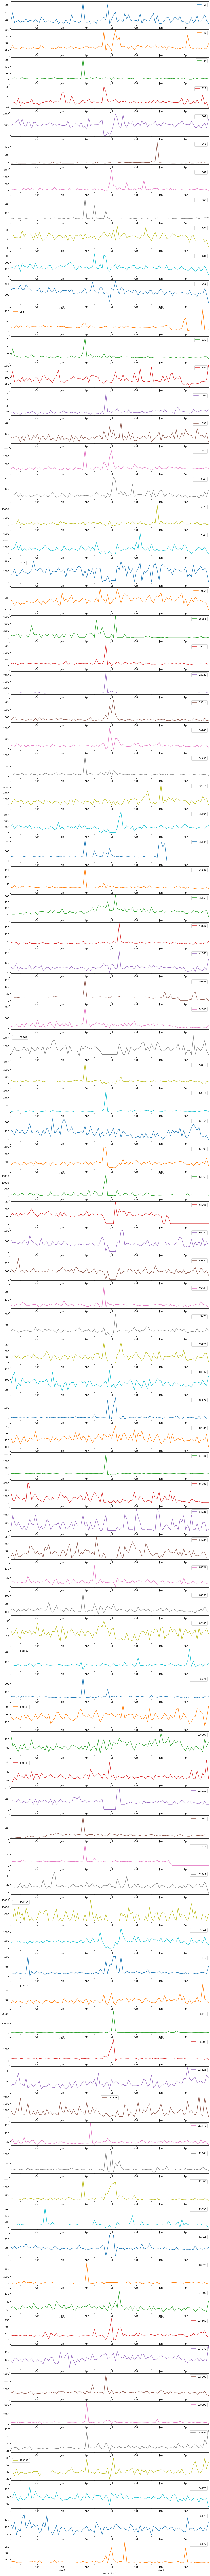

In [12]:
#Make time plots for each item.

ax = df4.plot(subplots=True, figsize=(15,200), sharex=False)

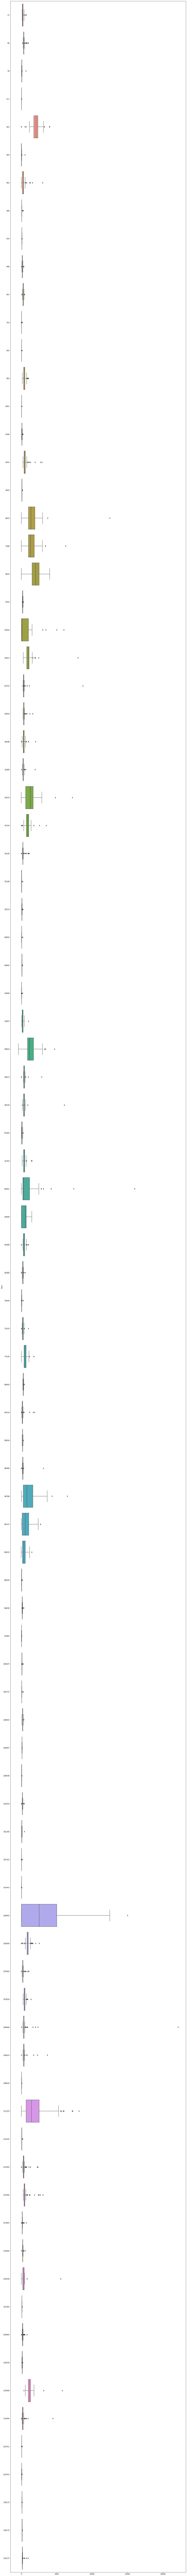

In [13]:
#Make boxplot for each item.

plt.figure(figsize=(20,300))
ax = sns.boxplot(data=df4, orient='h')

## A final data frame from the story telling activities is created and saved.

In [15]:
df5 = df[['Company','Company Name','Item','Description','Qty','STOCK_UOM','Trans_UOM','UNIT_COST','Ext Amount','TRANS_DATE','Item Type','Sys','Document','Doc Type','Line Nbr','Req Nbr','From Location',
          'From Loc Name','Req Location','Track_UOM_Conv','conv_qty','Week_Start']]            

print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474649 entries, 0 to 474648
Data columns (total 22 columns):
Company           474649 non-null category
Company Name      474649 non-null object
Item              474649 non-null int64
Description       474649 non-null object
Qty               474649 non-null int64
STOCK_UOM         474649 non-null object
Trans_UOM         474383 non-null object
UNIT_COST         474649 non-null float64
Ext Amount        474649 non-null float64
TRANS_DATE        474649 non-null datetime64[ns]
Item Type         474649 non-null object
Sys               474649 non-null object
Document          474649 non-null category
Doc Type          474649 non-null object
Line Nbr          474649 non-null category
Req Nbr           474649 non-null category
From Location     474649 non-null category
From Loc Name     474649 non-null object
Req Location      474649 non-null category
Track_UOM_Conv    474649 non-null int64
conv_qty          474649 non-null int64
Week_Start

In [16]:
df5.to_csv("...\Demand Forecasting Data Story.csv")
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474649 entries, 0 to 474648
Data columns (total 49 columns):
Company            474649 non-null category
Company Name       474649 non-null object
Item               474649 non-null int64
Description        474649 non-null object
Qty                474649 non-null int64
STOCK_UOM          474649 non-null object
Trans_UOM          474383 non-null object
UNIT_COST          474649 non-null float64
Ext Amount         474649 non-null float64
TRANS_DATE         474649 non-null datetime64[ns]
Item Type          474649 non-null object
Sys                474649 non-null object
Document           474649 non-null category
Doc Type           474649 non-null object
Line Nbr           474649 non-null category
Req Nbr            474649 non-null category
From Location      474649 non-null category
From Loc Name      474649 non-null object
Req Location       474649 non-null category
TRACKING_FL_01     474649 non-null object
TRACKING_FL_02     0 non-null

## This data set has 2 years worth of orders for 92 items in the warehouse. The data was sorted by item and week starting date. Then, it was inspected for missing dates. The data was reshaped so that it could be plotted with time plots and box plots, and the values for the missing dates were filled in with zeros. The final data set was saved so that it will be ready for the next step in the project, which in inferential statistics.